Bir okulda öğrencilerin sınav puanlarının ortalamasının 80 olup olmadığını test edin.
bir grup ve oran olduğu için -> tek örneklem testi

Çift yönlü test (two-tailed test), H₀ (null hipotezi) ve H₁ (alternatif hipotez)'in belirli bir değeri eşit ya da farklı olduğunu test etmek için kullanılır. Bu tür testlerde, hem daha büyük hem de daha küçük farkların anlamlı olup olmadığına bakılır.

Neden Çift Yönlü Test Yapıyoruz?
Tek örneklem t-testinin (one-sample t-test) formülünü ele alalım:

H₀: Örneklem ortalaması, popülasyon ortalamasına eşittir. (µ = 80)
H₁: Örneklem ortalaması, popülasyon ortalamasından farklıdır. (µ ≠ 80)
Bu durumda, H₁'deki "farklıdır" ifadesi, iki olasılığı içerir:

Örneklem ortalaması 80'den büyükse.
Örneklem ortalaması 80'den küçükse.
Bu yüzden, hem sağ hem de sol kuyrukları kontrol etmemiz gerekir. Yani çift yönlü test yapılır.



In [24]:
import numpy as np
from scipy import stats
alpha = 0.05
# Öğrencilerin sınav puanları (örnek veri)
exam_scores = [85, 90, 78, 88, 92, 77, 80, 84, 91, 89]
ort = np.mean(exam_scores)
n = len(exam_scores)
hyp = 80
s = np.std(exam_scores, ddof=1)
payda = np.sqrt( s**2 / n)
sonuc = (ort - hyp) / payda 
sonuc


3.10392674421936

In [26]:
degrees_of_freedom = n - 1
#çift kuyruk testi
t = 2 * (1 - stats.t.cdf(sonuc, df=degrees_of_freedom))
t
if t < alpha:
    print("h0 red")
else:
    print("h0 kabul")



h0 red


Bir şehirdeki kadınlar ve erkeklerin maaşları arasında bir fark olup olmadığını test edin.









In [30]:

from scipy import stats

# Kadınların maaşları (örnek veri)
female_salaries = [5000, 5200, 5300, 5500, 4800, 5100, 5400, 5000, 5600, 5300]

# Erkeklerin maaşları (örnek veri)
male_salaries = [6000, 6300, 6200, 6100, 6400, 5900, 6500, 6600, 6300, 6200]

x1 = np.mean(female_salaries)
x2=np.mean(male_salaries)
s1 = np.std(female_salaries, ddof=1)
s2 = np.std(male_salaries, ddof=1)
n1 = len(female_salaries)
n2= len(male_salaries)
pay = (x1 - x2)
payda = np.sqrt((s1**2 / n1) + (s2**2 / n2))

t_stat= pay / payda
t_stat

dof = n1 + n2 - 2

#iki yönlü kuyruk

p = s * ( 1 - stats.t.cdf(np.abs(t_stat), df=dof))

if p < alpha:
    print("h0 red")
else:
    print("h0 kabul")



h0 red


Bir okulda çocukların %40'ının A+ notu aldığına dair iddiaları doğru mu? -> bunu python ile kodlayalım

Bu soruda tek örneklem oran testi (One-Sample Proportion Test) kullanacağız. Çünkü burada tek bir grup (çocuklar) içerisindeki A+ notu alma oranının belirli bir değere (bu durumda %40) karşı test edilmesi isteniyor.

In [43]:
import numpy as np
from scipy import stats

alpha = 0.05
# Örnekleme veri (örnek olarak 100 öğrenci verisi kullanalım)
# A+ alan öğrenci sayısı
num_A_plus = 45
# Toplam öğrenci sayısı
total_students = 100

# Örneklem oranı
p = num_A_plus / total_students

# Popülasyon oranı
p0 = 0.45

# Standart hata (Standard Error)
se = np.sqrt((p0 * (1 - p0)) / total_students)

# Z-skoru hesaplama
z = (p - p0) / se

# Çift kuyruk testi (p-değerini hesaplama)
sonuc = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Sonucu kontrol etme
if sonuc < alpha:
    print("H0 reddedilir: Çocukların A+ notu alma oranı %40'tan farklıdır.")
else:
    print("H0 kabul edilir: Çocukların A+ notu alma oranı %40'tır.")


H0 kabul edilir: Çocukların A+ notu alma oranı %40'tır.


Öğrencilerin final sınavı puanları ile önceki sınav puanları arasındaki farkın anlamlı olup olmadığını test edin. 
bağımlı iki örneklem t-testini (paired sample t-test) kullanmamız gerekiyor. Çünkü burada aynı öğrencilerden alınan iki ölçüm (önceki sınav puanları ve final sınavı puanları) arasındaki farkı test edeceğiz.

In [45]:
import numpy as np
from scipy import stats
alpha = 0.05
# Öğrencilerin önceki sınav ve final sınavı puanları (örnek veri)
previous_scores = np.array([75, 80, 85, 90, 88, 70, 76, 82, 91, 84])
final_scores = np.array([80, 85, 90, 95, 92, 74, 78, 86, 95, 89])
x1 = np.mean(previous_scores)
x2 = np.mean(final_scores)
s1 = np.std(previous_scores, ddof=1)
s2 = np.std(final_scores, ddof=1)
n1 = len(previous_scores)
n2 = len(final_scores)
payda = np.sqrt((s1**2/n) + (s2**2/n))
pay = x1 - x2
t = pay / payda
dof = n1 + n2 - 2
#çift kuyruk
p = 2 * ( 1 - stats.t.cdf(np.abs(t),df=dof))
if p < alpha:
    print("H0 reddedilir: Çocukların A+ notu alma oranı %40'tan farklıdır.")
else:
    print("H0 kabul edilir: Çocukların A+ notu alma oranı %40'tır.")


H0 kabul edilir: Çocukların A+ notu alma oranı %40'tır.


Bir okulda erkek ve kız öğrencilerin matematik sınavı ortalamalarını karşılaştırmak istiyoruz.
iki grup ve sürekli değişken olduğu için iki örneklem t testi kulanılır

In [64]:
import numpy as np
import pandas as pd
alpha = 0.05
erkek_puanlar = np.array([78, 85, 88, 92, 76, 81, 95, 89, 84, 91])
kiz_puanlar = np.array([82, 79, 85, 88, 90, 83, 87, 80, 86, 78])

x1 = np.mean(erkek_puanlar)
x2 = np.mean(kiz_puanlar)
s1 = np.std(erkek_puanlar, ddof=1)
s2= np.std(kiz_puanlar, ddof=1)
n1 = len(erkek_puanlar)
n2=len(kiz_puanlar)
pay = x1 - x2
payda = np.sqrt( (s1**2)/n1 + (s2**2)/n2)
t = pay/payda
dof = n1 + n2 - 2
#çift kuyruk testi
from scipy import stats
p = 2 * ( 1 - stats.t.cdf(np.abs(t), df=dof))

if p < alpha:
    print("Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark yok.")

print(t)
print(p)

Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark yok.
0.8940893525776691
0.3830734770927189


In [54]:
import numpy as np
from scipy.stats import ttest_ind

# Örnek veri: Erkek ve kız öğrencilerin matematik sınavı puanları
erkek_puanlar = np.array([78, 85, 88, 92, 76, 81, 95, 89, 84, 91])
kiz_puanlar = np.array([82, 79, 85, 88, 90, 83, 87, 80, 86, 78])

# Bağımsız t-testi
t_stat, p_value = ttest_ind(erkek_puanlar, kiz_puanlar)

# Sonuçları yazdır
print("t-Statistik Değeri:", t_stat)
print("p-Değeri:", p_value)

# Karar
alpha = 0.05  # İstatistiksel anlamlılık seviyesi
if p_value < alpha:
    print("Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark var.")
else:
    print("Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark yok.")


t-Statistik Değeri: 0.8940893525776693
p-Değeri: 0.38307347709271866
Sonuç: Erkek ve kız öğrencilerin matematik sınavı ortalamaları arasında istatistiksel olarak anlamlı bir fark yok.


Stack Overflow kullanıcıları arasında 'child' kategorisinde olanların oranı gerçekten %35'twn büyük mü?
Null Hipotezi (H0): 'child' kategorisinde olan kullanıcıların oranı %35'ten büyüktür
#0ne sample proportion

In [66]:
df_stck = pd.read_feather("data/stack_overflow.feather")
df_stck

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2256,62812.0,I am a developer by profession,Yes,40.0,10.0,child,Yearly,145000.0,145000.0,United States,...,Too long,No,"Computer science, computer engineering, or sof...",Flask;jQuery,Angular;Angular.js;Flask;jQuery;React.js,Somewhat less welcome now than last year,50.0,30.0,20.0,At least 30
2257,62835.0,I am a developer by profession,Yes,23.0,9.0,child,Monthly,180000.0,33972.0,Russian Federation,...,Too short,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET Core;Flask,Just as welcome now as I felt last year,60.0,8.0,3.0,Under 30
2258,62837.0,I am a developer by profession,Yes,27.0,8.0,child,Monthly,7500.0,97284.0,Germany,...,Appropriate in length,No,Mathematics or statistics,None,None,Just as welcome now as I felt last year,42.0,12.0,2.0,Under 30
2259,62867.0,"I am not primarily a developer, but I write co...",Yes,33.0,13.0,child,Monthly,6000.0,72000.0,Panama,...,Too long,No,"Another engineering discipline (such as civil,...",None,Django;React.js,A lot less welcome now than last year,45.0,15.0,2.0,At least 30


In [70]:
hyp = 0.35
alpha = 0.05
pz = len(df_stck[df_stck['age_first_code_cut'] == 'child']) / len(df_stck)
n = len(df_stck)
se = np.sqrt( hyp * ( 1 - hyp ) / n)
pay = pz - hyp 
z = pay / se
#sağ kuyruk testi
from scipy import stats
sonuc = 1 - stats.norm.cdf(z)
if sonuc < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


'adult' ve 'child' grupları arasındaki 'converted_comp' adlı değişkenin ortalamaları arasındaki farkın istatistiksel olarak anlamlı olup olmadığını test et.
h0 = adult grubu ortalamasının child grubu ortalamasından büyüktür.
#iki örneklem t testi kullanmalıyız

In [91]:
alpha= 0.05
x = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()
x1 = x.iloc[0]
x2 = x.iloc[1]
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()
s1 = s.iloc[0]
s2 = s.iloc[1]
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()
n1 = n.iloc[0]
n2=n.iloc[1]
pay = x1 - x2
payda = np.sqrt((s1**2/n1) + (s2**2/n2))
t_d= pay / payda
dof = n1 + n2 - 2
#sağ kuyruk testi
from scipy import stats
p = 1 - stats.t.cdf(np.abs(t_d), df=dof)
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
p

H0 reddedilir.


0.030811302165157595

örneğin 2008 ve 2012 verilerinden yaratılan **`diff`** sütunu) tek bir örneklem verisi (farklar) üzerinden, “bu ortalama fark sıfır mı?” hipotezi test ediliyor.
h0 = 2008 değerinin ort 2012 değerinin ort küçüktür.
#tek örneklem t testi kullanılır çünkü tek veri -> diff sütunu)

In [101]:
import pandas as pd
import numpy as np
df_election = pd.read_feather('data/repub_votes_potus_08_12.feather')
df_y = df_election.copy()
df_y['diff'] = df_y['repub_percent_08'] - df_y['repub_percent_12']
x = df_y['diff'].mean()
m = 0
s = np.std(df_y['diff'], ddof=1)
n = len(df_y)
payda = np.sqrt(s**2/n)
pay = x - m
t_d = pay /payda
dof = n - 1
#sol kuyruk
from scipy import stats
p = stats.t.cdf(np.abs(t_d), df=dof)
p = 1 - stats.t.cdf(np.abs(t_d), df=dof)
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
p

H0 reddedilir.


9.572537285063021e-08

In [ ]:
#H₀: 'job_sat' kategorisindeki grupların 'converted_comp' ortalamaları eşittir.
#birden fazla grup olduğu için anova

In [109]:
import pingouin
pingouin.anova(data=df_stck , dv = "converted_comp" , between = "job_sat") # p değeri anlamlılık düzeyinden küçük. h0 reddedilir!

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


#Stackoverflow veri setindeki popülasyondaki kullanıcıların yarısının otuz yaşın altında olduğunu varsayalım ve bir fark olup olmadığını kontrol edelim. Anlamlılık düzeyini 0.01 olarak belirleyelim. Örneklemde , kullanıcıların yarısından biraz fazlası otuz yaşın altındadır.  
H0 = 0.5  
Ha != 0.5

In [137]:
p_hat = (df_stck["age_cat"] == "Under 30").mean()
p_hat
p0 = 0.5
n=len(df_stck)
se = np.sqrt( p0 * (1-p0) / n)
pay = p_hat - p0
sonuc = pay / se
sonuc
#çift kuyruk. çünkü küçüktür ya da byüktür diye belirtilmemiş
from scipy import stats
p = 2 * ( 1 - stats.norm.cdf(np.abs(sonuc)))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
sonuc

H0 reddedilir.


3.385911440783663

Stack Overflow anketi bir hobbyist değişkeni içermektedir. "Evet" değeri kullanıcının kendisini hobici olarak tanımladığı, "Hayır" değeri ise kendisini profesyonel olarak tanımladığı anlamına gelmektedir. Hobi sahibi kullanıcıların oranının otuz yaş altı kategorisi ile otuz yaş ve üstü kategorisi için aynı olduğu varsayılabilir, bu da iki kuyruklu bir testtir. Daha açık bir ifadeyle , boş hipotez her bir grup için popülasyon parametreleri arasındaki farkın sıfır olduğudur. Anlamlılık düzeyini 0.05 olarak belirleyelim.   
H0 : p>=30 - p<30 =0  
Ha : ? p>=30- p<30=! 0

In [158]:
p_hat = df_stck.groupby('age_cat')['hobbyist'].value_counts(normalize=True)
otuz_buyuk = p_hat[('At least 30', 'Yes')]
otuz_kucuk = p_hat[('Under 30', 'Yes')]
n = df_stck.groupby('age_cat')['hobbyist'].count()
n_30buyuk = n['At least 30']
n_30kucuk = n['Under 30'] 
se = np.sqrt( (otuz_buyuk * ( 1 - otuz_buyuk) / n_30buyuk) + (otuz_kucuk * ( 1 - otuz_kucuk) / n_30kucuk))
z = (otuz_buyuk - otuz_kucuk) / se
z
#çift kuyruk testi olmalı:
from scipy import stats
p = 2 * (1 - stats.norm.cdf(np.abs(z)))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
p

H0 reddedilir.


2.6876347940296696e-05

Bir telekomünikasyon şirketinin müşteri verilerine dayalı olarak, total_day_charge ve total_eve_charge değişkenlerini kullanarak, churn (hizmet iptali) durumunu tahmin etmek için bir K-Nearest Neighbors (KNN) modeli geliştirin. Modeli eğitin ve verilen yeni müşteri verileri (X_new) için hizmet iptali durumunu tahmin edin.

In [164]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']] #bağımsız değişken
y = df_churn['churn'] #bağımlı değişken
model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y) #model eğitimi
predictions = model_knn.predict(X_new)
predictions

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1, 0, 0])

In [329]:
df

,EmployeeID,Department,MonthlySalary,HoursWorked,RemoteWork,SatisfactionScore
0,1,Sales,5087.05,40.07,0,3
1,2,Marketing,4700.99,47.27,0,5
2,3,HR,5091.76,38.68,0,5
3,4,IT,3012.43,53.60,0,2
4,5,Sales,4780.33,43.13,1,4
...,...,...,...,...,...,...
95,96,IT,4184.19,32.82,0,2
96,97,IT,4922.90,45.82,1,1
97,98,IT,5341.15,40.05,0,3
98,99,Sales,5276.69,35.09,0,1


In [331]:
df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge','total_eve_charge']].values
y = df_churn['churn'].values 
X_train, X_test, y_train,y_test = train_test_split(X, y , train_size = 0.2,stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
acc

0.8560179977502812

In [353]:
import random
rnd = random.sample(list(df['MonthlySalary']), 30)  
x = np.mean(rnd)
m = 5000
s = np.std(rnd, ddof=1)
n = len(rnd)
payda = np.sqrt(s**2/n)
t_d = (x-m) / payda
dof = n - 1
#çift kuyruk
p = 2 * (1-t.cdf(np.abs(t_d), df=dof))
if p < 0.05:
    print("ho reddedilir")
else:
    print("ho reddedilmez")


ho reddedilmez


In [411]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Bağımsız değişkenler (X) ve bağımlı değişken (y) belirleme
X = df[['HoursWorked', 'MonthlySalary', 'Department']]  # Bağımsız değişkenler
y = df['RemoteWork']  # Bağımlı değişken (0 veya 1)

# Eksik verileri doldurma
imp = SimpleImputer(strategy='mean')
X = imp.fit_transform(X)

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression modeli
model = LogisticRegression()
model.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Doğruluk skoru hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy}")


Model Doğruluğu: 0.35


### Sürekli Dağılım: 
Belirli bir aralıkta tüm olası değerleri alabilen ve sonsuz sayıda olası sonucu içeren dağılımlardır. 
# Normal Dağılım: Çan eğrisi şeklindedir. ( Doğal olaylar -> boy, ağırlık)
# Uniform dağılım: Belli bir aralıkta tüm değerlerin eşit olasılıkta seçilebildiği dağılımdır. (0 - 1 arasında rastgele sayı seçmek)
# Üstel dağılım: Olaylar arasındaki süreleri modellemek için kullanılır. (tel çağrısı süresi)

### Kesikli Dağılım:
Belli ve sayılabilir sayıda değer alabilen.
# Binom Dağılım: Bir olayın belirli bir sayıda gerçekleşme olasılığını ifade eder.(10 kez zar atıldığında 3 kere 5 gelmesi)
# Poisson Dağılımı: Belirli bir zaman aralığonda nadir olayların gelme olasılığı ( 2 saatte 1 müşteri gelmesi)

In [377]:
import pandas as pd
from scipy.stats import chisquare

# Gözlenen frekansları hesapla
rm = df['RemoteWork'].value_counts()
rm = rm.rename_axis('RemoteWork').reset_index(name='n').sort_values('RemoteWork')

# Beklenen frekansları hesapla (verilen oranlara göre)
hyp = pd.DataFrame({
    'RemoteWork': ['0', '1'],
    'prop': [5/6, 1/6]  # Beklenen oranlar
})

# Toplam örneklem büyüklüğünü al
n_total = len(df)

# Beklenen frekansları hesapla
hyp['n'] = hyp['prop'] * n_total

# Chi-square testini uygula
chi2_stat, p_value = chisquare(f_obs=rm['n'], f_exp=hyp['n'])

# Sonuçları yazdır
print(f"Chi2 İstatistiği: {chi2_stat}")
print(f"P-değeri: {p_value}")

# P-değerini yorumla
alpha = 0.01
if p_value < alpha:
    print("H0 reddedilir: Gözlenen ve beklenen frekanslar arasında anlamlı bir fark vardır.")
else:
    print("H0 reddedilmez: Gözlenen ve beklenen frekanslar arasında anlamlı bir fark yoktur.")


Chi2 İstatistiği: 32.768000000000015
P-değeri: 1.0384026966524731e-08
H0 reddedilir: Gözlenen ve beklenen frekanslar arasında anlamlı bir fark vardır.


In [180]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# KNN Modeli
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

# Tahmin
predictions = knn.predict(X_test)
print("Tahminler:", predictions)

# Model Doğruluğu
accuracy = knn.score(X_test, y_test)
print("Doğruluk Skoru:", accuracy)


Tahminler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0

Text(0.5, 0, 'Body Mass Index')

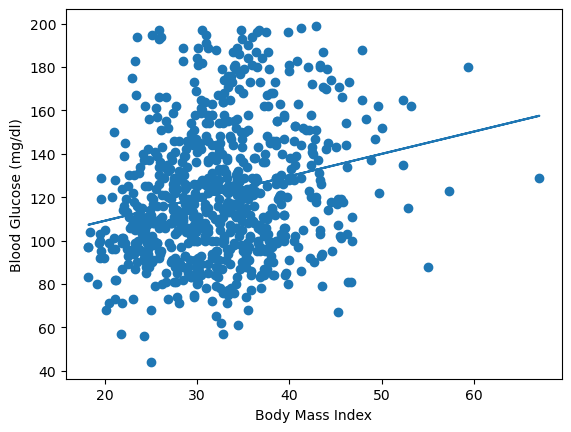

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df_diabets = pd.read_csv('data/diabetes_clean.csv')
df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)
X = df_diabets.drop('glucose', axis=1).values #: Bu satırda, df_diabets DataFrame'inden glucose sütunu hariç diğer tüm sütunlar seçilir. drop('glucose', axis=1) ifadesi, glucose sütununu kaldırır. axis=1 parametresi, sütunları ifade eder (satırları ifade etmek için axis=0 kullanılır). Sonuçta X'te, glucose haricindeki bağımsız değişkenlerin verileri saklanır.
y = df_diabets['glucose'].values #Bu satırda ise glucose sütunu bağımlı değişken olarak seçilir. Bu, modelin tahmin etmeye çalışacağı hedef değişkendir. X_bmi = X[:, 4] #X[:, 4]: Bu komut, X veri setinin 4. sütununu seçer. 0 tabanlı indekslemeye dikkat edilmelidir. Bu satırda, BMI sütunu X veri setinin 4. sütunu olarak seçilmiştir.
X_bmi = X[:, 4]
X_bmi = X_bmi.reshape(-1, 1) #1d veriyi 2d hale getirmek için


model_reg = LinearRegression()
model_reg.fit(X_bmi, y) #model BMI ile kan şekeri arasındaki doğrusal ilişkiyi öğrenir

predictions = model_reg.predict(X_bmi) #tahmin yürütür

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions) #tahmin, oğrusal regresyon modelinin tahmin ettiği ilişkiyi gösteren çizgidir. Model bu çizgiyi, verilen BMI değerlerine karşılık gelen kan şekeri tahminlerini yaparak çiziyor.
plt.ylabel('Blood Glucose (mg/dl)')
plt.xlabel('Body Mass Index')

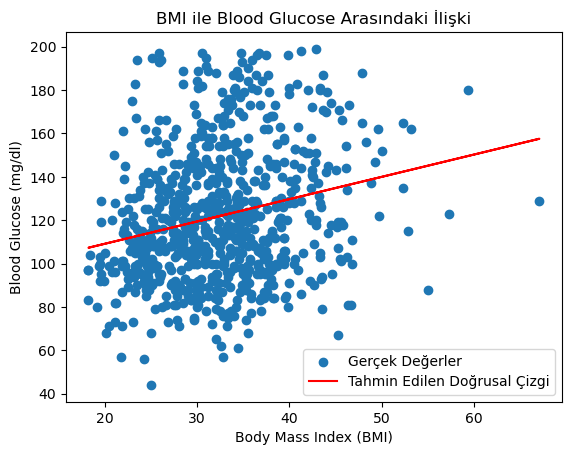

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Veri okuma
df_diabetes = pd.read_csv('data/diabetes_clean.csv')

# Eksik veya hatalı veri temizleme
df_filtered = df_diabetes[(df_diabetes['bmi'] == 0.0) | (df_diabetes['glucose'] == 0.0)]
df_diabetes.drop(df_filtered.index, inplace=True)

# Bağımsız ve bağımlı değişkenlerin seçimi
X = df_diabetes['bmi'].values.reshape(-1, 1)  # BMI bağımsız değişken olarak seçildi (2D hale getirildi)
y = df_diabetes['glucose'].values  # Kan şekeri bağımlı değişken

# Model eğitimi
model_reg = LinearRegression()
model_reg.fit(X, y)

# Tahmin
predictions = model_reg.predict(X)

# Görselleştirme
plt.scatter(X, y, label="Gerçek Değerler")
plt.plot(X, predictions, color='red', label="Tahmin Edilen Doğrusal Çizgi")
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Blood Glucose (mg/dl)')
plt.title('BMI ile Blood Glucose Arasındaki İlişki')
plt.legend()
plt.show()


#bu kod, **doğrusal regresyon (Linear Regression)** kullanarak **diabetes veri kümesi** üzerinde bir model oluşturuyor ve bu modelin **kan şekeri seviyelerini** tahmin etmesini sağlıyor. sonrasında ne kadar başarılı olduğunu ölç.


In [212]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Veri okuma
df_diabetes = pd.read_csv('data/diabetes_clean.csv')

ddf_filtered = df_diabetes[(df_diabetes['bmi'] == 0.0) | (df_diabetes['glucose'] == 0)]
df_diabetes.drop(df_filtered.index, inplace=True)
X = df_diabets.drop('glucose', axis=1).values #bağımsız değişkenler
y=df_diabetes['glucose'].values #bağımlı değişken

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
model_reg = LinearRegression()
model_reg.fit(X_train,y_train) #model eğitildi
predictions = model_reg.predict(X_test)
model_reg.score(X_test, y_test)

0.3282802627263198

In [214]:
model_reg.coef_
# Bu, eğitilen doğrusal regresyon modelinin katsayılarını (coefficients) döndüren bir özelliktir.
#Katsayılar, her bağımsız değişkenin (özelliklerin) bağımlı değişken üzerindeki etkisini gösterir. Yani, modelin öğrenmiş olduğu eğim (m) değerleridir. Örneğin, BMI gibi bir bağımsız değişkenin katsayısı, BMI'deki bir birimlik değişikliğin kan şekeri üzerindeki etkisini gösterir.
#Eğer model birden fazla bağımsız değişken içeriyorsa, her bağımsız değişken için ayrı bir katsayı değeri olacaktır.

array([-0.32654116,  0.14686555, -0.27590315,  0.08606826,  0.36160446,
        1.8382773 ,  0.42185562, 25.08247323])

In [218]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, predictions) #modelin tahmin ettiği değerlerle gerçek değerler arasındaki farkların karelerinin ortalamasıdır. Daha düşük MSE, modelin daha iyi olduğunu gösterir.

25.695203763480208

In [222]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).values
y = df_diabets['glucose'].values

kf= KFold(n_splits=6, shuffle=True, random_state=42)
model_Reg=LinearRegression()
cv_results = cross_val_score(model_reg, X, y, cv=kf)
cv_results

array([0.31239631, 0.39992274, 0.38698031, 0.19731639, 0.32317527,
       0.3320924 ])

In [224]:
# Confusion matrix in scikit-learn

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values #bağımsız değişkenler
y= df_churn['churn'].values #bağımlı değişken

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train, y_train) #model eğitildi

y_predict = model_log.predict(X_test) #doğrudan tahmin. 0 ya da 1 olur.(iptal etti - etmedi)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [226]:
y_pred_probs = model_log.predict_proba(X_test) #modelin her örnek için her sınıfa ait olasılıkları döndürür. ilk sütun 0 olma olasılığı ikinci satır 1 olma olasılığı
y_pred_probs

array([[0.82892316, 0.17107684],
       [0.92986818, 0.07013182],
       [0.98204431, 0.01795569],
       ...,
       [0.91093968, 0.08906032],
       [0.92723286, 0.07276714],
       [0.9081191 , 0.0918809 ]])

In [228]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/Generated_Employee_Data.csv")
df

,EmployeeID,Department,MonthlySalary,HoursWorked,RemoteWork,SatisfactionScore
0,1,Sales,5087.05,40.07,0,3
1,2,Marketing,4700.99,47.27,0,5
2,3,HR,5091.76,38.68,0,5
3,4,IT,3012.43,53.60,0,2
4,5,Sales,4780.33,43.13,1,4
...,...,...,...,...,...,...
95,96,IT,4184.19,32.82,0,2
96,97,IT,4922.90,45.82,1,1
97,98,IT,5341.15,40.05,0,3
98,99,Sales,5276.69,35.09,0,1


Bir şirkette çalışanların ortalama maaşı 5000 TL olduğuna inanılıyor. 30 çalışanın maaşları incelenerek, şirketin maaş ortalamasının 5000 TL'den farklı olup olmadığı test edilsin.

Hipotezler:

H0: Çalışanların maaş ortalaması 5000 TL.
Ha: Çalışanların maaş ortalaması 5000 TL'den farklıdır.

#one t testi


In [232]:
sample_data= df['MonthlySalary'].sample(30, random_state=42)
alpha = 0.05
m = 5000
x = np.mean(sample_data)
s = np.std(sample_data, ddof=1)
n = len(sample_data)
payda = np.sqrt(s**2 / n)
t = (x-m) / payda
dof = n - 1
#çift kuyruk
from scipy import stats
p = 2 * ( 1 - stats.t.cdf(np.abs(t), df=dof))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
sonuc

H0 kabul edilir.


3.385911440783663

Soru: Şirketin çalışanlarının %50'sinin uzaktan çalıştığı iddia edilmektedir. Çalışanların %50'sinin uzaktan çalışıp çalışmadığını test edelim.

Hipotezler:

H0: Uzaktan çalışanların oranı %50'dir.
Ha: Uzaktan çalışanların oranı %50 değildir.

#one sample pro

In [249]:
p = (df['RemoteWork'] == 1).mean()
alpha = 0.05
p0 = 0.5
n=len(df)
se = np.sqrt( p0 * ( 1 - p0 ) / n)
z = (p - p0) / se
#çift kuyruk testi
from scipy import stats 
p = 2 * ( 1 - stats.norm.cdf(np.abs(z)))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
p

H0 reddedilir.


0.01639507184919231

Soru: IT ve HR departmanlarının maaş ortalamaları arasında fark olup olmadığını test edelim.

Hipotezler:

H0: IT ve HR departmanlarının maaş ortalamaları eşittir.
Ha: IT ve HR departmanlarının maaş ortalamaları farklıdır
#two sample t test

In [270]:
x = df.groupby('Department')['MonthlySalary'].mean()
x1 = x.iloc[1]
x2 = x.iloc[0]
s = df.groupby('Department')['MonthlySalary'].std()
s1 = s.iloc[1]
s2=s.iloc[2]
n = df.groupby('Department')['MonthlySalary'].count()
n1 = n.iloc[0]
n2 = n.iloc[1]
pay = x1 - x2
payda = np.sqrt((s1**2/n1) + (s2**2/n2))
t = pay / payda
dof = n1 + n2 - 2
from scipy import stats
p = 2 * (1 - stats.t.cdf(np.abs(t), df=dof))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
p       

H0 kabul edilir.


0.1270802192019016

In [ ]:
# 3. İki bağımsız grup - Ortalama (sürekli)
# Soru: IT ve HR departmanlarının maaş ortalamaları arasında fark olup olmadığını test edelim.
# H0: IT ve HR departmanlarının maaş ortalamaları eşittir.
# Ha: IT ve HR departmanlarının maaş ortalamaları farklıdır.

# IT ve HR maaşlarını ayır
it_salaries = employee_data.loc[employee_data['Department'] == 'IT', 'MonthlySalary']
hr_salaries = employee_data.loc[employee_data['Department'] == 'HR', 'MonthlySalary']

# Gerekli parametreleri hesapla
mean_it = it_salaries.mean()
mean_hr = hr_salaries.mean()
std_it = np.std(it_salaries, ddof=1)
std_hr = np.std(hr_salaries, ddof=1)
n_it = len(it_salaries)
n_hr = len(hr_salaries)

# Standart hata ve T-istatistiği
se = np.sqrt((std_it**2 / n_it) + (std_hr**2 / n_hr))
t_stat = (mean_it - mean_hr) / se

# Serbestlik derecesi
dof = ((std_it**2 / n_it) + (std_hr**2 / n_hr))**2 / (
    ((std_it**2 / n_it)**2 / (n_it - 1)) + ((std_hr**2 / n_hr)**2 / (n_hr - 1))
)

# P-Değeri (çift kuyruklu test)
from scipy import stats
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=dof))

# Karar
alpha = 0.05
if p_value < alpha:
    result = "H0 reddedilir. IT ve HR departmanlarının maaş ortalamaları farklıdır."
else:
    result = "H0 reddedilemez. IT ve HR departmanlarının maaş ortalamaları eşit olabilir."

t_stat, p_value, result


Bir araştırmada, uzaktan çalışan ve ofiste çalışan çalışanların iş memnuniyet puanlarının farklı olup olmadığı test edilsin.

Hipotezler:

H0: Uzaktan çalışan ve ofiste çalışan çalışanların iş memnuniyet medyanları eşittir.
Ha: Uzaktan çalışan ve ofiste çalışan çalışanların iş memnuniyet medyanları farklıdır.

#iki bapımsız ve medyan olduğu için mann whitney


In [282]:
import pandas as pd
df = pd.read_csv("data/Generated_Employee_Data.csv")
uzak_vs_yakin = df[['RemoteWork', 'SatisfactionScore']]
uzak_vs_yakin_wide = uzak_vs_yakin.pivot(columns = 'RemoteWork', values='SatisfactionScore')
import pingouin
pingouin.mwu(x = uzak_vs_yakin_wide[0], y=uzak_vs_yakin_wide[1], alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,1047.5,two-sided,0.344867,-0.110781,0.44461


In [ ]:
Soru: IT ve Sales departmanlarındaki çalışanların memnuniyet skorlarının medyanları arasında fark olup olmadığını test edelim.

Hipotezler:

H0: IT ve Sales departmanlarının memnuniyet skorlarının medyanları eşittir.
Ha: IT ve Sales departmanlarının memnuniyet skorlarının medyanları farklıdır.

In [290]:
import pandas as pd
it_vs_sales = df[['Department','SatisfactionScore']]
it_vs_sales_wide = it_vs_sales.pivot(columns='Department', values='SatisfactionScore')
import pingouin
pingouin.mwu(x = it_vs_sales_wide['IT'], y= it_vs_sales_wide['Sales'], alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,560.5,two-sided,0.919236,0.015399,0.507699


In [ ]:
Soru: Çalışanların ortalama maaşının 5000 TL olup olmadığını test edin.

Hipotez:
Null hipotezi (H0): Çalışanların maaşlarının ortalaması 5000 TL'dir.
Alternatif hipotez (H1): Çalışanların maaşlarının ortalaması 5000 TL değildir.

In [312]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/Generated_Employee_Data.csv")
m = 5000
alpha = 0.05
x = df['MonthlySalary'].mean()
s = np.std(df['MonthlySalary'], ddof=1)
n = len(df)
payda = np.sqrt( s**2 / n)
t = (x - m) / payda
dof = n - 1
#çift kuyruk
p = 2 * ( 1 - stats.t.cdf(np.abs(t), df=dof))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")
t

H0 kabul edilir.


-0.011837728780229389

In [302]:
from scipy import stats

# Maaşların ortalamasının 5000 TL olup olmadığını test et
t_stat, p_value = stats.ttest_1samp(df['MonthlySalary'], 5000)
t_stat, p_value


(-0.011837728780229392, 0.9905789020985529)

Soru: Çalışanların %60'ının uzaktan çalışıp çalışmadığını test edin.

Hipotez:
Null hipotezi (H0): Çalışanların %60'ı uzaktan çalışmaktadır.
Alternatif hipotez (H1): Çalışanların %60'ı uzaktan çalışmamaktadır.

In [328]:
import pandas as pd
from scipy import stats
import numpy as np

df = pd.read_csv("data/Generated_Employee_Data.csv")

# Beklenen oran
p0 = 0.6

# Gözlemlenen oran (uzaktan çalışanların oranı)
p = (df['RemoteWork'] == 1).mean()

# Veri sayısı
n = len(df['RemoteWork'])

# Standart hata
payda = np.sqrt(p0 * (1 - p0) / n)

# Z istatistiği
z = (p - p0) / payda

# Çift kuyruk testi için p-değeri
p_d = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Anlamlılık seviyesi
alpha = 0.05

if p_d < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


In [330]:
import numpy as np
from scipy import stats

# Maaş ve memnuniyet puanlarını iki gruba ayırın
high_salary = df[df['MonthlySalary'] > 5000]['SatisfactionScore']
low_salary = df[df['MonthlySalary'] <= 5000]['SatisfactionScore']

u_stat, p_value = stats.mannwhitneyu(____, ____)  # Buraya iki grup parametresini yazın

alpha = 0.05

if p_value < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 kabul edilir.


In [332]:
sample_data = df.sample(n=15, random_state=42)
av = sample_data['MonthlySalary'].mean()
av

5300.754000000001

In [340]:
sample = df.groupby('Department').sample(frac=0.1, random_state=42)
mem = sample['SatisfactionScore'].mean()
mem

2.7

In [352]:
# 1. Adım: Departmana göre gruplama ve her gruptan 5 örnek seçme (örneğin)
clusters = df.groupby('Department').sample(n=5, random_state=42)

# 2. Adım: Seçilen kümelerden 10 çalışan seçme (bu artık mümkün olacak çünkü her departmandan 5 çalışan var)
clusters_rast = clusters.sample(n=10, random_state=42)

# 3. Adım: Saatlik çalışma ortalamasını hesaplayın
saat = clusters_rast['HoursWorked'].mean()
print(saat)


39.653000000000006


In [354]:
first_code_boot_distn = []
for i in range(5000):
    first_code_boot_distn.append(
        np.mean(
            (df_stck.sample(frac=1, replace=True)
             ['age_first_code_cut'] == 'child').mean()
        )
    )

Stack Overflow kullanıcıları arasında 'child' kategorisinde olanların oranı gerçekten %35'twn büyük mü?
Null Hipotezi (H0): 'child' kategorisinde olan kullanıcıların oranı %35'ten büyüktür

In [361]:
import numpy as np
from scipy import stats

# Gözlemlenen oranı hesapla
p = (df_stck['age_first_code_cut'] == 'child').mean()

# Beklenen oran
hyp = 0.35

# Anlamlılık seviyesi
alpha = 0.05

# Veri sayısı
n = len(df_stck)

# Standart hata (se) hesaplama
se = np.sqrt(hyp * (1 - hyp) / n)

# Z istatistiği hesaplama
z = (p - hyp) / se

# Sağ kuyruk için p-değeri
p_value = 1 - stats.norm.cdf(np.abs(z))

# Hipotez testi sonucu
if p_value < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


'adult' ve 'child' grupları arasındaki 'converted_comp' adlı değişkenin ortalamaları arasındaki farkın istatistiksel olarak anlamlı olup olmadığını test et.
h0 = adult grubu ortalamasının child grubu ortalamasından büyüktür.

In [366]:
alpha= 0.05
x = df_stck.groupby('age_first_code_cut')['converted_comp'].mean()
x1 = x.iloc[0]
x2 = x.iloc[1]
s = df_stck.groupby('age_first_code_cut')['converted_comp'].std()
s1 = s.iloc[0]
s2 = s.iloc[1]
n = df_stck.groupby('age_first_code_cut')['converted_comp'].count()
n1 = n.iloc[0]
n2 = n.iloc[1]
pay = x1 - x2
se = np.sqrt((s1**2 / n1) + (s2**2 / n2))
t = pay / se
dof = n1 + n2 - 2
#sağ kuyruk testi
p = 1 - (stats.t.cdf(np.abs(t), df=dof))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


örneğin 2008 ve 2012 verilerinden yaratılan **`diff`** sütunu) tek bir örneklem verisi (farklar) üzerinden, “bu ortalama fark sıfır mı?” hipotezi test ediliyor.
h0 = 2008 değerinin ort 2012 değerinin ort'ından küçüktür.

In [372]:
sample_d = df.copy()
alpha = 0.05
sample_d['diff'] = df['repub_percent_08'] - df['repub_percent_12']
m = 0
x = sample_d['diff'].mean()
s = np.std(sample_d['diff'], ddof=1)
n = len(df_stck)
payda = np.sqrt(s**2 / n)
pay = x- m
t = pay / payda
dof = n-1
#sol
stats.t.cdf(np.abs(t), df=dof)
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


KeyError: 'repub_percent_08'

#Stackoverflow veri setindeki popülasyondaki kullanıcıların yarısının otuz yaşın altında olduğunu varsayalım ve bir fark olup olmadığını kontrol edelim. Anlamlılık düzeyini 0.01 olarak belirleyelim. Örneklemde , kullanıcıların yarısından biraz fazlası otuz yaşın altındadır.  
H0 = 0.5  
Ha != 0.5

In [385]:
p = (df_stck['age_cat'] == 'Under 30').mean()
n = len(df_stck)

In [387]:
p0 = 0.5
se = np.sqrt(p0 * ( 1 - p0 ) / n)
z = (p - p0) / se
#çift kuyruk testi
p = 1 - (stats.norm.cdf(np.abs(z)))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


Soru: Çalışanların 'RemoteWork' sütunundaki 1 (uzaktan çalışan) ve 0 (uzaktan çalışmayan) kategorilerindeki oran farkını test edin. H0 (Null Hipotezi): Uzaktan çalışanların oranı, uzaktan çalışmayanların oranından farklı değildir.

In [415]:
alpha = 0.05
p_hat = df['RemoteWork'].value_counts(normalize=True)
p0 = p_hat.iloc[0]
p1 = p_hat.iloc[1]
n0 = len(df[df['RemoteWork'] == 0])
n1 = len(df[df['RemoteWork'] == 1])
pay = p0 - p1
se = np.sqrt( (p0*( 1-p0) / n0) + (p1 *(1-p1) / n1))
z = pay / se
# H0 (Null Hipotezi): Uzaktan çalışanların oranı, uzaktan çalışmayanların oranından farklı değildir. -> çift kuyruk testi yapılmalı
p = 2 * ( 1 - stats.norm.cdf(np.abs(z)))
if p < alpha:
    print("H0 reddedilir.")
else:
    print("H0 kabul edilir.")


H0 reddedilir.


In [417]:
import numpy as np
from scipy import stats

alpha = 0.05

# Oranları hesapla
p_hat = df['RemoteWork'].value_counts(normalize=True)
p0 = p_hat.iloc[0]  # Uzaktan çalışmayanların oranı (0)
p1 = p_hat.iloc[1]  # Uzaktan çalışanların oranı (1)

# Grup büyüklüklerini hesapla
n0 = len(df[df['RemoteWork'] == 0])  # Uzaktan çalışmayanların sayısı
n1 = len(df[df['RemoteWork'] == 1])  # Uzaktan çalışanların sayısı

# Oranlar arasındaki fark
pay = p0 - p1

# Standart hata (se)
se = np.sqrt((p0 * (1 - p0) / n0) + (p1 * (1 - p1) / n1))

# Z istatistiği
z = pay / se

# Çift kuyruklu p-değeri
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))

# Sonuçları değerlendir
if p_value < alpha:
    print("H0 reddedilir: Uzaktan çalışanların oranı, uzaktan çalışmayanlardan farklıdır.")
else:
    print("H0 kabul edilir: Uzaktan çalışanların oranı, uzaktan çalışmayanlardan farklı değildir.")


H0 reddedilir: Uzaktan çalışanların oranı, uzaktan çalışmayanlardan farklıdır.


"Veri setimdeki müşteri bilgilerini kullanarak, bir müşterinin hizmet iptali (churn) yapıp yapmadığını tahmin etmek istiyorum. Bu problem için hangi modelin daha uygun olduğunu nasıl belirlerim ve hangi adımları izlemeliyim?"

In [422]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df_churn = pd.read_csv("data/telecom_churn_clean.csv")
X = df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y) #model eğitimi
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
model_knn.predict(X_new)

array([1, 0, 0])

In [426]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8605697151424287

Aşağıdaki Python kodu ile, vücut kitle indeksi (BMI) ile kan şekeri düzeyi (glucose) arasındaki ilişkiyi incelemeye çalışan bir model oluşturulmaktadır. Bu modelin amacı, BMI'yi bağımsız değişken olarak alıp, glucose'u tahmin etmektir.

Katsayı (slope): [1.02801737]
Kesim (intercept): 88.57754093395485


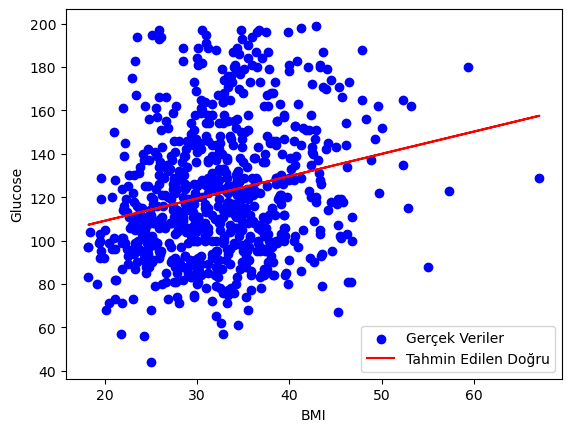

In [429]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Veri setini yükle
df_diabetes = pd.read_csv('data/diabetes_clean.csv')

# 'bmi' ve 'glucose' sütununda 0 değeri olan satırları filtrele ve kaldır
df_filtered = df_diabetes[(df_diabetes['bmi'] == 0.0) | (df_diabetes['glucose'] == 0)]
df_diabetes.drop(df_filtered.index, inplace=True)

# Bağımsız değişken (X) ve bağımlı değişken (y) olarak veriyi ayır
X = df_diabetes['bmi'].values.reshape(-1, 1)  # X'yi 2D formata dönüştür
y = df_diabetes['glucose'].values

# Linear Regression modelini oluştur ve eğit
model_reg = LinearRegression()
model_reg.fit(X, y)

# Model ile tahmin yap (eğitim verisiyle de test yapabilirsiniz)
predictions = model_reg.predict(X)

# Modelin katsayılarını ve kesişim noktasını yazdır
print("Katsayı (slope):", model_reg.coef_)
print("Kesim (intercept):", model_reg.intercept_)

# Tahmin sonuçlarını görselleştirelim
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Gerçek Veriler')
plt.plot(X, predictions, color='red', label='Tahmin Edilen Doğru')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.legend()
plt.show()


 kullanarak **diabetes veri kümesi** üzerinde bir model oluşturuyor ve bu modelin **kan şekeri seviyelerini** tahmin etmesini sağlıyor


In [434]:
X = df_diabetes.drop('glucose', axis=1).values
y = df_diabetes['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
model_l = LinearRegression()
model_l.fit(X_train, y_train)
pred = model_l.predict(X_test)
model_l.score(X_test, y_test)

0.3282802627263198

In [415]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
df_diabets = pd.read_csv('data/diabetes_clean.csv')

df_filtered = df_diabets[(df_diabets['bmi'] == 0.0) | (df_diabets['glucose'] == 0)]
df_diabets.drop(df_filtered.index, inplace=True)

X = df_diabets.drop('glucose', axis=1).kfvalues
y = df_diabets['glucose'].values

kfold = KFold(n_splits=6, shuffle=True, random_state=42)
model_l = LinearRegression()
res = cross_val_score(model_l, X,y,cv=kfold)
res

AttributeError: 'DataFrame' object has no attribute 'kfvalues'

Department ve RemoteWork arasındaki bağımsızlık ilişkisini test edin. Bu test, farklı departmanlarda uzaktan çalışma oranlarının birbirinden bağımsız olup olmadığını belirleyecektir.

In [439]:
import pandas as pd
import numpy as np
df = pd.read_csv("data/Generated_Employee_Data.csv")
expected , observed, stats = pingouin.chi2_independence(data=df, x='Department', y='RemoteWork')
stats

/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,4.447889,3.0,0.216986,0.210900,0.395656
1,cressie-read,0.666667,4.572942,3.0,0.205876,0.213844,0.405915
2,log-likelihood,0.000000,4.951015,3.0,0.175419,0.222509,0.436579
3,freeman-tukey,-0.500000,5.387218,3.0,0.145542,0.232104,0.471176
4,mod-log-likelihood,-1.000000,6.012544,3.0,0.111002,0.245205,0.519016
5,neyman,-2.000000,8.201329,3.0,0.042029,0.286380,0.666212


RemoteWork ve SatisfactionScore kategorik değişkenlerinin beklenen ve gözlenen frekanslarının uyumlu olup olmadığını test edin. 

In [446]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

X= df_churn[['total_day_charge', 'total_eve_charge']].values
y = df_churn['churn'].values

model_knn = KNeighborsClassifier(n_neighbors=15)
model_knn.fit(X,y)
X_new = np.array([
    [56.8, 17.5],
    [24.4, 24.1],
    [50.1, 10.9]
])
model_knn.predict(X_new)

array([1, 0, 0])

Verilen veri setini kullanarak bir KNN modeli oluşturun ve çalışanların uzaktan çalışma durumunu tahmin edin

In [454]:
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print("Tahminler:", y_pred)
model_knn.score(X_test, y_test)

Tahminler: [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]


0.7

Bir çalışanın çalışma saatleri (HoursWorked) ile maaşı (MonthlySalary) arasındaki doğrusal ilişkiyi incelemek için bir model oluşturun

In [466]:
from sklearn.linear_model import LinearRegression
X = df['HoursWorked'].values.reshape(-1,1)
y = df['MonthlySalary'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model_reg = LinearRegression()
model_reg.fit(X_train,y_train)
model_reg.predict(X_test)
model_reg.score(X_test, y_test)

-0.006181633738065129

In [464]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Bağımsız ve bağımlı değişkenleri ayır
X = df['HoursWorked'].values.reshape(-1, 1)
y = df['MonthlySalary'].values

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Test seti ile tahmin yap
y_pred = model_reg.predict(X_test)

# Modelin doğruluğunu (R^2) hesapla
score = model_reg.score(X_test, y_test)

# Sonuçları yazdır
print("Tahminler:", y_pred)
print("Modelin doğruluk skoru (R^2):", score)


Tahminler: [4828.53590459 4841.70252361 5003.34378265 5198.60194133 4612.8274653
 4830.77703123 4928.82632181 4759.62126035 4870.55702912 4934.98942008
 4912.57815366 4864.67407169 4880.36195818 4397.39916685 4708.35548841
 4849.26632602 4639.720985   4792.39773748 5055.44997708 4864.95421252]
Modelin doğruluk skoru (R^2): -0.351820397734369


Verilen veri setinde, çalışanların uzaktan çalışma durumunu tahmin etmek için bir KNN modeli oluşturun ve performansını cross-validation (çapraz doğrulama) yöntemiyle değerlendirin.

In [475]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
X= df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values
kf = KFold(n_splits = 5, shuffle=True, random_state=42)
model_reg=KNeighborsClassifier(n_neighbors=5)
cv_results = cross_val_score(model_reg, X, y, cv = kf)
cv_results.mean()

0.53

In [473]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Bağımsız ve bağımlı değişkenlerin seçimi
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values

# KNN Modeli
model_knn = KNeighborsClassifier(n_neighbors=5)

# Cross-validation
cv_scores = cross_val_score(model_knn, X, y, cv=5)  # 5-fold cross-validation

# Her bir fold için doğruluk skorlarını yazdır
print("Fold doğruluk skorları:", cv_scores)

# Ortalama doğruluk
mean_score = cv_scores.mean()
print(f"Ortalama Doğruluk: {mean_score:.2f}")


Fold doğruluk skorları: [0.45 0.6  0.45 0.45 0.45]
Ortalama Doğruluk: 0.48


In [417]:
import pandas as pd
from scipy.stats import ttest_ind

# Verileri oku
df = pd.read_csv("data/Generated_Employee_Data.csv")

# Satış ve pazarlama departmanları için maaşları al
sales_salary = df[df["Department"] == "Sales"]["MonthlySalary"]
marketing_salary = df[df["Department"] == "Marketing"]["MonthlySalary"]

# Bağımsız t-testini gerçekleştir
t_statistic, p_value = ttest_ind(sales_salary, marketing_salary)

print(f"t-istatistiği: {t_statistic}")
print(f"p-değeri: {p_value}")

# Sonucu yorumla
if p_value < 0.05:
    print("Boş hipotezi reddediyoruz. Satış departmanındaki çalışanların ortalama aylık maaşı, pazarlama departmanındakilerden daha yüksektir.")
else:
    print("Boş hipotezi reddetmiyoruz. Satış ve pazarlama departmanlarındaki çalışanların ortalama aylık maaşları arasında fark yoktur.")

t-istatistiği: 0.9007434376185062
p-değeri: 0.37179962843943914
Boş hipotezi reddetmiyoruz. Satış ve pazarlama departmanlarındaki çalışanların ortalama aylık maaşları arasında fark yoktur.


In [425]:
import pandas as pd
from scipy.stats import t

# Verileri oku
df = pd.read_csv("data/Generated_Employee_Data.csv")

# Satış ve pazarlama departmanları için maaşları al
x1= (df[df["Department"] == "Sales"]["MonthlySalary"]).mean()
x2= (df[df["Department"] == "Marketing"]["MonthlySalary"]).mean()
s1 = (df[df["Department"] == "Sales"]["MonthlySalary"]).std(ddof=1)
s2 = (df[df["Department"] == "Marketing"]["MonthlySalary"]).std(ddof=1)
n1 = (df[df["Department"] == "Sales"]["MonthlySalary"]).count()
n2 = (df[df["Department"] == "Marketing"]["MonthlySalary"]).count()
dof = n1 + n2 - 2
pay = x1 - x2
payda = np.sqrt((s1**2/n1) + (s2**2/n2))
t_statistic =  pay / payda

p_value = 2 * ( 1- t.cdf(np.abs(t_statistic), df=dof))

print(f"t-istatistiği: {t_statistic}")
print(f"p-değeri: {p_value}")

# Sonucu yorumla
if p_value < 0.05:
    print("Boş hipotezi reddediyoruz. Satış departmanındaki çalışanların ortalama aylık maaşı, pazarlama departmanındakilerden daha yüksektir.")
else:
    print("Boş hipotezi reddetmiyoruz. Satış ve pazarlama departmanlarındaki çalışanların ortalama aylık maaşları arasında fark yoktur.")

t-istatistiği: 0.9460688841130364
p-değeri: 0.34840691868477114
Boş hipotezi reddetmiyoruz. Satış ve pazarlama departmanlarındaki çalışanların ortalama aylık maaşları arasında fark yoktur.


 Departmanlar arasında memnuniyet puanları açısından anlamlı bir fark var mıdır?

In [430]:
pingouin.anova(data = df, dv='SatisfactionScore', between = 'Department')

,Source,ddof1,ddof2,F,p-unc,np2
0,Department,3,96,0.353198,0.786919,0.010917


Verilen veri setinde çalışanların uzaktan çalışma durumu (RemoteWork) yerine, çalışanların çalışma saatlerini (HoursWorked) tahmin etmek için bir Ridge regresyon modeli oluşturun ve model performansını değerlendirin.

In [490]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
X = df[['MonthlySalary', 'RemoteWork', 'SatisfactionScore']].values
y = df['HoursWorked'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = ridge.score(X_test, y_test)
mse = root_mean_squared_error(y_test,y_pred)
mse

7.454046068152741

In [488]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Bağımsız ve bağımlı değişkenler
X = df[['MonthlySalary', 'RemoteWork', 'SatisfactionScore']].values
y = df['HoursWorked'].values

# Eğitim ve test veri setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regresyon Modeli
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Tahmin
y_pred = ridge.predict(X_test)

# Performans Değerlendirme
r2 = ridge.score(X_test, y_test)  # R² Skoru
mse = mean_squared_error(y_test, y_pred)  # Ortalama Kare Hatası (MSE)
rmse = np.sqrt(mse)  # Kök Ortalama Kare Hatası (RMSE)

print("R² Skoru:", r2)
print("Ortalama Kare Hatası (MSE):", mse)
print("Kök Ortalama Kare Hatası (RMSE):", rmse)


R² Skoru: -0.6101848964304173
Ortalama Kare Hatası (MSE): 55.56280278614334
Kök Ortalama Kare Hatası (RMSE): 7.454046068152741


 Verilen veri setini kullanarak, çalışanların uzaktan çalışıp çalışmadığını (RemoteWork) tahmin etmek için bir sınıflandırma modeli oluşturun ve modelin performansını confusion matrix ile analiz edin.

In [493]:
from sklearn.metrics import classification_report, confusion_matrix
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 7,  0],
       [13,  0]])


Logistic Regression Sorusu
Bir sınıflandırma problemi için, çalışanların uzaktan çalışıp çalışmadığını (RemoteWork) tahmin etmek amacıyla bir Logistic Regression modeli oluşturun ve modelin performansını değerlendirin.

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Bağımsız ve bağımlı değişkenler
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Modeli
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Tahminler
y_pred = model_log.predict(X_test)

# Performans Metrikleri
accuracy = accuracy_score(y_test, y_pred)  # Doğruluk
cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
classification_rep = classification_report(y_test, y_pred)  # Precision, Recall, F1-Score

# Sonuçları Yazdırma
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_rep)


Doğruluk (Accuracy): 0.35

Confusion Matrix:
 [[ 7  0]
 [13  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.35      1.00      0.52         7
           1       0.00      0.00      0.00        13

    accuracy                           0.35        20
   macro avg       0.17      0.50      0.26        20
weighted avg       0.12      0.35      0.18        20



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Bir sınıflandırma problemi için, verilen veri setinde KNN (K-Nearest Neighbors) modelini optimize edin ve en iyi hiperparametreleri belirlemek için Grid Search Cross Validation (GS-CV) yöntemini kullanın.

Soru:
Hedef Model: KNN.
Hedef:
En iyi n_neighbors (komşu sayısı) ve weights (ağırlıklandırma metodu) parametrelerini bulmak.
Hiperparametre Aralığı:
n_neighbors: [3, 5, 7, 9, 11]
weights: ['uniform', 'distance']
Grid Search Cross Validation kullanarak en iyi kombinasyonu belirleyin.
En iyi modelin doğruluğunu test edin.


In [ ]:
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_neighbors': [3,5,7,9,11],  # alpha parametresinin farklı değerlerini deniyoruz
    'weights': ['uniform', 'distance']  # Ridge regresyonu için farklı çözüm yöntemleri
}

model_knn = KNeighborsClassifier()
grid = GridSearchCV(model_knn, param_grid, cv=5)

In [503]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Bağımsız ve bağımlı değişkenleri seçme
X = df[['MonthlySalary', 'HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values

# Eğitim ve test setine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hiperparametre aralığı belirleme
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance']
}

# KNN Modeli
knn = KNeighborsClassifier()

# Grid Search Cross Validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# En iyi parametreler ve doğruluk
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Test seti üzerinde performans değerlendirme
y_pred = grid_search.best_estimator_.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Sonuçları yazdırma
print("En İyi Parametreler:", best_params)
print("CV Üzerindeki En İyi Doğruluk:", best_score)
print("Test Seti Doğruluğu:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


En İyi Parametreler: {'n_neighbors': 9, 'weights': 'uniform'}
CV Üzerindeki En İyi Doğruluk: 0.575
Test Seti Doğruluğu: 0.55
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.92      0.71        12
           1       0.00      0.00      0.00         8

    accuracy                           0.55        20
   macro avg       0.29      0.46      0.35        20
weighted avg       0.35      0.55      0.43        20



Veri setinizde eksik değerleri doldurmak için Simple Imputer'ı kullanın.
Aşağıdaki stratejilere göre eksik verileri doldurun:
Sayısal sütunlar için ortalama (mean).
Kategorik sütunlar için en sık kullanılan değer (most_frequent).
Eksik veriler tamamlandıktan sonra bağımlı değişkeni tahmin etmek için bir Linear Regression modeli eğitin.
Modelin R² ve MSE değerlerini hesaplayın.

In [1]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Kategorik ve sayısal sütunları ayırma
object_cols = list(df.select_dtypes(include='object').columns)  # Kategorik sütunlar
X_cat = df[object_cols]
X_nums = df.drop(object_cols, axis=1)  # Sayısal sütunlar

# Kategorik sütunlardaki eksik değerleri doldurma
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_cat), columns=X_cat.columns)

# Sayısal sütunlardaki eksik değerleri doldurma
num_imputer = SimpleImputer(strategy='mean')
X_nums_imputed = pd.DataFrame(num_imputer.fit_transform(X_nums), columns=X_nums.columns)

# Sayısal ve kategorik sütunları birleştirme
X_cleaned = pd.concat([X_nums_imputed, X_cat_imputed], axis=1)

# Bağımsız ve bağımlı değişkenleri ayırma
y = X_cleaned['target_column']  # Buraya bağımlı değişken sütununuzu yazın
X = X_cleaned.drop('target_column', axis=1)

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Modeli
model = LinearRegression()
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Performans Metrikleri
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdırma
print("R² Skoru:", r2)
print("Ortalama Kare Hatası (MSE):", mse)


NameError: name 'df' is not defined

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import t

# Veri yükleme
df = pd.read_csv("data/Generated_Employee_Data.csv")

# Parametreler
alpha = 0.05
x = df['HoursWorked'].mean()  # Örneklem ortalaması
m = 40  # Hipotez edilen ortalama
s = np.std(df['HoursWorked'], ddof=1)  # Standart sapma
n = len(df)  # Örneklem büyüklüğü

# Test istatistiği hesaplama
payda = s / np.sqrt(n)
t_stat = (x - m) / payda
dof = n - 1

# Sağ kuyruk testi için p-değeri
p = 1 - t.cdf(t_stat, df=dof)

# Sonuçları yorumlama
if p < alpha:
    print("H0 reddedildi: Çalışma saatleri ortalaması 40'tan büyüktür.")
else:
    print("H0 kabul edilemez: Çalışma saatleri ortalaması 40'tan büyük değildir.")

print("Test İstatistiği (t):", t_stat)
print("P-Değeri:", p)


H0 kabul edilemez: Çalışma saatleri ortalaması 40'tan büyük değildir.
Test İstatistiği (t): 0.336270654554279
P-Değeri: 0.3686892398897077


In [25]:
#Marketing ve IT departmanlarının memnuniyet puanlarının medyanları arasında fark olup olmadığını test edin.
import pingouin
df = pd.read_csv("data/Generated_Employee_Data.csv")
x1 = df[df['Department']== 'Marketing']['SatisfactionScore']
x2 = df[df['Department']== 'IT']['SatisfactionScore']
pingouin.mwu(x=x1, y=x2, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,124.5,two-sided,0.506977,0.152778,0.576389


In [27]:
df

,EmployeeID,Department,MonthlySalary,HoursWorked,RemoteWork,SatisfactionScore
0,1,Sales,5087.05,40.07,0,3
1,2,Marketing,4700.99,47.27,0,5
2,3,HR,5091.76,38.68,0,5
3,4,IT,3012.43,53.60,0,2
4,5,Sales,4780.33,43.13,1,4
...,...,...,...,...,...,...
95,96,IT,4184.19,32.82,0,2
96,97,IT,4922.90,45.82,1,1
97,98,IT,5341.15,40.05,0,3
98,99,Sales,5276.69,35.09,0,1


Çalışanların %30’unun uzaktan çalıştığını iddia eden hipotezi test edin.

In [33]:
import numpy as np
from scipy.stats import norm

# Parametreler
alpha = 0.05
p_observed = df['RemoteWork'].mean()  # Uzaktan çalışma oranı
p0 = 0.3  # Hipotez edilen oran
n = len(df)  # Örneklem büyüklüğü

# Standard error (SE) hesaplama
se = np.sqrt(p0 * (1 - p0) / n)

# Z-Skoru hesaplama
z = (p_observed - p0) / se

# Çift kuyruk testi için p-değeri
p_value = 2 * (1 - norm.cdf(abs(z)))

# Sonuçları değerlendirme
if p_value < alpha:
    print("H0 reddedildi: Uzaktan çalışanların oranı %30 değildir.")
else:
    print("H0 kabul edildi: Uzaktan çalışanların oranı %30'dur.")

# Sonuçları yazdırma
print("Z-Skoru:", z)
print("P-Değeri:", p_value)


H0 kabul edildi: Uzaktan çalışanların oranı %30'dur.
Z-Skoru: 1.7457431218879393
P-Değeri: 0.0808555983700523


T departmanındaki çalışanların maaşlarının HR departmanındaki çalışanların maaşlarından farklı olup olmadığını test edin.

In [41]:
import numpy as np
from scipy.stats import t

# Parametreler
alpha = 0.05
it_salaries = df[df['Department'] == 'IT']['MonthlySalary']
hr_salaries = df[df['Department'] == 'HR']['MonthlySalary']

# Ortalamalar, standart sapmalar ve örnek büyüklükleri
x1 = it_salaries.mean()
x2 = hr_salaries.mean()
s1 = it_salaries.std()
s2 = hr_salaries.std()
n1 = it_salaries.count()
n2 = hr_salaries.count()

# Test istatistiği hesaplama
pay = x1 - x2
payda = np.sqrt((s1**2 / n1) + (s2**2 / n2))
t_stat = pay / payda
dof = n1 + n2 - 2

# Çift kuyruklu test için p-değeri hesaplama
p_value = 2 * (1 - t.cdf(abs(t_stat), df=dof))

# Sonuçları değerlendirme
if p_value < alpha:
    print("H0 reddedildi: IT ve HR departmanlarının maaş ortalamaları arasında fark vardır.")
else:
    print("H0 kabul edildi: IT ve HR departmanlarının maaş ortalamaları arasında fark yoktur.")

# Test istatistiği ve p-değeri yazdırma
print("T-İstatistiği:", t_stat)
print("P-Değeri:", p_value)


H0 kabul edildi: IT ve HR departmanlarının maaş ortalamaları arasında fark yoktur.
T-İstatistiği: -1.567215009226417
P-Değeri: 0.12439490193551639


Çalışanların memnuniyet puanına göre uzaktan çalışıp çalışmadığını tahmin eden bir KNN modeli oluşturun.

In [56]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
X = df['SatisfactionScore'].values.reshape(-1,1)
y = df['RemoteWork'].values
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
report = classification_report(y_test, y_pred)
report

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.60      1.00      0.75        12\n           1       0.00      0.00      0.00         8\n\n    accuracy                           0.60        20\n   macro avg       0.30      0.50      0.38        20\nweighted avg       0.36      0.60      0.45        20\n'

In [68]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
X = df[['MonthlySalary', 'HoursWorked']].values
y = df['Department'].astype('category').cat.codes.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_log=LogisticRegression()
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
y_pred

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int8)

Çalışanların maaşına göre memnuniyet puanını tahmin etmek için bir Ridge Regresyon modeli oluşturun.

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X = df['MonthlySalary'].values.reshape(-1,1)
y = df['SatisfactionScore'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
y_pred

array([3.08099233, 2.9884023 , 2.92985899, 2.95600382, 3.09172611,
       3.05265732, 3.02899639, 3.17750855, 3.10165294, 3.03553659,
       2.99729152, 3.17913841, 3.05229256, 3.02264616, 3.09420283,
       3.01105515, 2.97431143, 3.04712601, 2.98630472, 3.04252297])

Çalışma saatine ve maaşa göre uzaktan çalışma durumunu (evet/hayır) tahmin eden bir KNN modeli oluşturun.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Bağımsız ve bağımlı değişkenler
X = df[['HoursWorked', 'MonthlySalary']].values  # Çalışma saatleri ve maaş
y = df['RemoteWork'].values  # Uzaktan çalışma durumu

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# KNN Modeli
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

# Tahminler
y_pred = model_knn.predict(X_test)

# Performans Metrikleri
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Sonuçları Yazdırma
print("Doğruluk Skoru:", accuracy)
print("Classification Report:\n", report)


Doğruluk Skoru: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.25      0.40         8

    accuracy                           0.70        20
   macro avg       0.83      0.62      0.60        20
weighted avg       0.80      0.70      0.64        20



Çalışanların çalışma saatine göre memnuniyet puanını tahmin eden bir doğrusal regresyon modeli oluşturun

In [81]:
from sklearn.linear_model import LinearRegression
X = df['HoursWorked'].values.reshape(-1,1)
y = df['SatisfactionScore'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_pred = model_reg.predict(X_test)
y_pred

array([2.97053787, 3.09784881, 3.21300859, 2.92276175, 2.9865553 ,
       2.91558153, 2.99401169, 3.13043599, 2.96059602, 2.94761638,
       3.25553762, 3.23758705, 3.18207838, 2.97136636, 3.11138077,
       3.13071215, 3.10171508, 2.93353209, 2.8214101 , 3.13236912])

Soru: Şirketin günlük işe giriş saatlerinin ortalamasının 9:00 olduğunu varsayalım. Çalışanların giriş saatlerinin normal dağılım gösterdiğini ve standart sapmasının 15 dakika olduğunu düşünün. Giriş saatinin 8:45’ten erken olma olasılığını bulun.

In [85]:
norm.cdf(8.45, 9.0, 15)


0.48537539345385444

In [83]:
# 12. Çalışanların 8:30'dan sonra işe gelme olasılığını bulun.
1 - norm.cdf(8.30, 9.00, 15)

0.5186105512328761

In [89]:
# 13. Bir çalışanın günde 8 müşteri görüşmesi yapma olasılığını hesaplayın 
from scipy.stats import poisson
poisson.pmf(8,5)


0.06527803934815865

14. Öğle yemeği süresi 30 dakikadan kısa sürede bitirme olasılığını bulun

In [94]:
from scipy.stats import expon
expon.cdf(30, scale=45)

0.486582880967408

In [98]:
# 15. En fazla 15 çalışanın işten ayrılma olasılığını hesaplayın 
from scipy.stats import binom
binom.cdf(15,100,0.2)

0.1285055148387977

 Bir çalışanın uzaktan çalışıp çalışmadığını, aylık maaşı ve çalışma saatleri üzerinden tahmin edin (KNN kullanarak).

In [102]:
df

,EmployeeID,Department,MonthlySalary,HoursWorked,RemoteWork,SatisfactionScore
0,1,Sales,5087.05,40.07,0,3
1,2,Marketing,4700.99,47.27,0,5
2,3,HR,5091.76,38.68,0,5
3,4,IT,3012.43,53.60,0,2
4,5,Sales,4780.33,43.13,1,4
...,...,...,...,...,...,...
95,96,IT,4184.19,32.82,0,2
96,97,IT,4922.90,45.82,1,1
97,98,IT,5341.15,40.05,0,3
98,99,Sales,5276.69,35.09,0,1


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X = df[['MonthlySalary', 'HoursWorked']].values
y = df['RemoteWork'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7

Çalışanların maaşı ve çalışma saatleriyle memnuniyet skorlarını tahmin eden bir model oluşturun. Modelin performansını değerlendirin.


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[['MonthlySalary', 'HoursWorked']].values
y = df['SatisfactionScore'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
model_l = LinearRegression()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
root = mean_squared_error(y_test, y_pred)
root

2.3415251918512787

Çalışanların çalışma saatleri ve memnuniyet skorlarıyla uzaktan çalışıp çalışmadığını tahmin eden bir sınıflandırma modeli oluşturun. Model doğruluğunu hesaplayın.

In [126]:
X = df[['HoursWorked', 'SatisfactionScore']].values
y = df['RemoteWork'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.55

Çalışanların departmanlarına göre maaşlarını tahmin eden bir model oluşturun. Modelin tahmin doğruluğunu ölçün.

In [138]:
X = df['Department'].astype('category').cat.codes.values.reshape(-1, 1)
y = df['MonthlySalary'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model_l = LinearRegression()
model_l.fit(X_train, y_train)
y_pred = model_l.predict(X_test)
y_pred

array([5027.04448265, 4841.22775324, 4841.22775324, 4903.16666304,
       5027.04448265, 4903.16666304, 5027.04448265, 4841.22775324,
       5027.04448265, 5027.04448265, 4903.16666304, 4903.16666304,
       4841.22775324, 4965.10557284, 5027.04448265, 5027.04448265,
       4841.22775324, 5027.04448265, 4841.22775324, 5027.04448265])

Çalışanların maaşlarına ve memnuniyet skorlarına göre hangi departmanda çalıştıklarını tahmin edin. Model performansını raporlayın.

In [153]:
from sklearn.linear_model import LogisticRegression
X = df[['MonthlySalary', 'SatisfactionScore']].values
y = df['Department'].astype('category').cat.codes.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model_lo = LogisticRegression()
model_lo.fit(X_train, y_train)
y_pred = model_lo.predict(X_test)
classf = classification_report(y_test, y_pred)
classf

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         6\n           1       0.00      0.00      0.00         4\n           2       0.00      0.00      0.00         1\n           3       0.45      1.00      0.62         9\n\n    accuracy                           0.45        20\n   macro avg       0.11      0.25      0.16        20\nweighted avg       0.20      0.45      0.28        20\n'

Çalışanların %50'sinin maaşının 60,000'den fazla olup olmadığını test edin.
#one prop

In [155]:
import numpy as np
from scipy.stats import norm

# Veriler
count = (df['MonthlySalary'] > 60000).sum()  # Maaşı 60,000'den fazla olanların sayısı
n = len(df)  # Toplam çalışan sayısı
p_hat = count / n  # Gözlemlenen oran
p0 = 0.5  # Hipotez edilen oran

# Standart Hata
se = np.sqrt(p0 * (1 - p0) / n)

# Z-Statistik
z = (p_hat - p0) / se

# Sağ kuyruk testi
p_value = 1 - norm.cdf(z)

# Sonuç
alpha = 0.05
if p_value < alpha:
    print("H0 reddedildi: Çalışanların %50'sinin maaşı 60,000'den fazla değildir.")
else:
    print("H0 kabul edildi: Çalışanların %50'sinin maaşı 60,000'den fazladır.")

print(f"Z-Statistik: {z}, P-Değeri: {p_value}")


H0 kabul edildi: Çalışanların %50'sinin maaşı 60,000'den fazladır.
Z-Statistik: -10.0, P-Değeri: 1.0


In [ ]:
#Çalışma saatlerinin Marketing ve IT departmanlarında eşit olup olmadığını test edin.
#ikili t test
x1 = df[df['Department'] == 'Marketing']['HoursWorked'].mean()
x2 = df[df['Department'] == 'IT']['HoursWorked'].mean()
s1 = df[df['Department'] == 'Marketing']['HoursWorked'].std(ddof=1)
s2 = df[df['Department'] == 'IT']['HoursWorked'].std(ddof=1)
n1 = df[df['Department'] == 'Marketing']['HoursWorked'].count()
n2 = df[df['Department'] == 'IT']['HoursWorked'].count()
dof = n1+n2-2
pay = x1-x2
payda = np.sqrt((s1**2/n1) + (s2**2/n2))
t_ = pay/payda
#çift kuyruk testi
p = 2*(1-t.cdf(np.abs(t_), df=dof))


In [ ]:
Çalışanların memnuniyet puanlarının yaşlarına bağlı olarak(Genç: 30 yaşından küçük
Orta Yaşlı: 30-50 yaş arası
Yaşlı: 50 yaşından büyük
) değişip değişmediğini test edin.


In [157]:
from scipy.stats import kruskal

young = df[df['Age'] < 30]['SatisfactionScore']
middle = df[(df['Age'] >= 30) & (df['Age'] <= 50)]['SatisfactionScore']
older = df[df['Age'] > 50]['SatisfactionScore']

stat, p_value = kruskal(young, middle, older)
print("P-value:", p_value)


KeyError: 'Age'

HR ve Sales departmanlarının çalışanlarının ortalama maaşlarının aynı olup olmadığını test edin.

In [160]:
ort = (df['MonthlySalary']).mean()
ss = (df['MonthlySalary']).std(ddof=1)
norm.cdf(50000, ort, ss)

1.0

In [162]:
from scipy.stats import norm

mean = df['MonthlySalary'].mean()
std = df['MonthlySalary'].std()

prob = norm.cdf(50000, loc=mean, scale=std)
print("Probability:", prob)


Probability: 1.0


In [ ]:
Çalışanların günlük 8 müşteriyle görüşme yapma olasılığını hesaplayın

In [164]:
binom.cdf(40, 50, 0.8)

0.5562595867082492

Bir ev fiyatlandırma veri setinde (AmesHousing.csv):

Numerik sütunlar (örneğin: LotArea, GrLivArea) içindeki eksik değerleri ortalama (mean) ile doldurun.
Kategorik sütunlar (örneğin: Neighborhood, HouseStyle) içindeki eksik değerleri en sık kullanılan değerle (most frequent) doldurun.
Eksik değerlerin doldurulduktan sonra doğruluğunu kontrol edin ve veri setindeki eksik değerlerin sayısını sıfıra indirgeyin.

In [167]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Veri setini yükleme
df = pd.read_csv("data/AmesHousing.csv")

# Eksik değerlerin kontrolü
print("Eksik değerler (Önce):\n", df.isna().sum().sort_values(ascending=False))

# Kategorik ve sayısal sütunları ayırma
object_cols = list(df.select_dtypes(include='object').columns)
X_cat = df[object_cols]  # Kategorik sütunlar
X_num = df.drop(object_cols, axis=1)  # Sayısal sütunlar

# Kategorik sütunlar için SimpleImputer
imp_cat = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(imp_cat.fit_transform(X_cat), columns=object_cols)

# Sayısal sütunlar için SimpleImputer
imp_num = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(imp_num.fit_transform(X_num), columns=X_num.columns)

# Kategorik ve sayısal sütunları tekrar birleştirme
df_cleaned = pd.concat([X_num, X_cat], axis=1)

# Eksik değerlerin doldurulup doldurulmadığını kontrol etme
print("\nEksik değerler (Sonra):\n", df_cleaned.isna().sum().sort_values(ascending=False))


Eksik değerler (Önce):
 Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
                ... 
PID                0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
SalePrice          0
Length: 82, dtype: int64

Eksik değerler (Sonra):
 Order             0
Bsmt Cond         0
Foundation        0
Exter Cond        0
Exter Qual        0
                 ..
Garage Yr Blt     0
Fireplaces        0
TotRms AbvGrd     0
Kitchen AbvGr     0
Sale Condition    0
Length: 82, dtype: int64


AmesHousing veri setini kullanarak, sayısal ve kategorik değişkenler için farklı işlem adımlarını içeren bir pipeline oluşturun. Bu pipeline'da:

Sayısal değişkenler için eksik değerleri ortalama ile doldurun ve StandardScaler kullanarak standartlaştırın.
Kategorik değişkenler için eksik değerleri "en sık kullanılan" ile doldurun.
Random Forest modeli ile eğitim yapıp test setinde doğruluk skorunu raporlayın.

In [180]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Veri setini yükle
df = pd.read_csv("data/Generated_Employee_Data.csv")

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop('SatisfactionScore', axis=1).values
y = df['SatisfactionScore'].values

# Veri setini eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline adımları
steps = [
    ('scaler', StandardScaler()),  # Veriyi standartlaştır
    ('knn', KNeighborsClassifier())  # KNN modeli
]
pipeline = Pipeline(steps)

# Hiperparametre aralığı
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9]  # KNN için komşu sayısını ayarla
}

# GridSearchCV ile hiperparametre optimizasyonu
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = grid_search.predict(X_test)

# Performans ölçümü
accuracy = accuracy_score(y_test, y_pred)
print("En iyi parametreler:", grid_search.best_params_)
print(f"Test seti doğruluğu: {accuracy:.2f}")


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 406, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 1310, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 313, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py", line 878, in fit
    return self.partial_fit(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_data.py", line 914, in partial_fit
    X = self._validate_data(
        ^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py", line 1012, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_array_api.py", line 751, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Marketing'


In [192]:
import pandas as pd
df = pd.read_csv("data/Bebek_verileri.csv")
df

,Bebek_ID,Yürüme_Yaşı,Doğum_Kilosu,Doğum_Ayı,Doğum_Yılı,Cinsiyet,Bebek_Kilosu_Bir_Yıl
0,1,15,4262,Nisan,2020,Erkek,8559
1,2,12,3112,Aralık,2021,Kız,11672
2,3,16,4466,Temmuz,2021,Erkek,12583
3,4,13,3985,Şubat,2022,Kız,12992
4,5,15,3142,Mart,2021,Erkek,11343
...,...,...,...,...,...,...,...
95,96,11,4215,Ağustos,2022,Erkek,11146
96,97,16,3636,Ocak,2020,Kız,8412
97,98,14,4353,Ağustos,2021,Kız,8728
98,99,11,4020,Nisan,2022,Kız,11348


In [194]:
#Bebeklerin yürüme yaşı, 12 ay olarak kabul edilen ortalamadan anlamlı bir şekilde farklı mı? (α = 0.05)
#one t test
import numpy as np
from scipy.stats import t

# Veriyi yüklediğini varsayıyorum
# df = pd.read_csv('bebek_verisi.csv')  # Örnek veri yükleme

alpha = 0.05
x = df['Yürüme_Yaşı'].mean()  # Örneklem ortalaması
m = 12  # Beklenen ortalama (12 ay)
ss = np.std(df['Yürüme_Yaşı'], ddof=1)  # Standart sapma
n = len(df)  # Örneklem büyüklüğü
pay = x - m  # Fark
payda = np.sqrt(ss**2 / n)  # Standart hata
t_d = pay / payda  # t-istatistiği
dof = n - 1  # Serbestlik derecesi

# Çift kuyruklu test, yani 2 * (1 - cdf)
p = 2 * (1 - t.cdf(np.abs(t_d), df=dof))

print("t-istatistiği:", t_d)
print("p-değeri:", p)

# Hipotez testi
if p < alpha:
    print("H0 reddedilir, bebeklerin yürüme yaşı 12 aydan farklıdır.")
else:
    print("H0 reddedilemez, bebeklerin yürüme yaşı 12 ayla aynıdır.")


13.32

In [200]:
import numpy as np
from scipy.stats import t

# Yaz ve kış bebeklerini ayırıyoruz
yaz_baby = df[df['Doğum_Ayı'].isin(['Haziran', 'Temmuz', 'Ağustos'])]
kis_baby = df[df['Doğum_Ayı'].isin(['Aralık', 'Ocak', 'Şubat'])]

# Yaz ve kış bebeklerinin doğum kilosu ortalama ve standart sapmaları
x1 = yaz_baby['Doğum_Kilosu'].mean()
x2 = kis_baby['Doğum_Kilosu'].mean()
s1 = yaz_baby['Doğum_Kilosu'].std(ddof=1)
s2 = kis_baby['Doğum_Kilosu'].std(ddof=1)
n1 = yaz_baby['Doğum_Kilosu'].count()
n2 = kis_baby['Doğum_Kilosu'].count()

# t-istatistiği hesaplama
pay = x1 - x2
payda = np.sqrt((s1**2 / n1) + (s2**2 / n2))
t_d = pay / payda

# Serbestlik derecesi
dof = n1 + n2 - 2

# Çift kuyruklu test için p-değerini hesaplama
p = 2 * (1 - t.cdf(np.abs(t_d), df=dof))

# Sonuçları yazdırma
print("t-istatistiği:", t_d)
print("p-değeri:", p)

# Hipotez testi
if p < 0.05:
    print("H0 reddedilir, yaz ve kış doğan bebeklerin doğum kilosu arasında anlamlı bir fark vardır.")
else:
    print("H0 reddedilemez, yaz ve kış doğan bebeklerin doğum kilosu arasında anlamlı bir fark yoktur.")


t-istatistiği: 0.9687111162935251
p-değeri: 0.33717358200616476
H0 reddedilemez, yaz ve kış doğan bebeklerin doğum kilosu arasında anlamlı bir fark yoktur.


In [218]:
# Verinize göre, 10 aydan önce yürümeye başlayan bebeklerin oranı %20'den farklı mı? (α = 0.05)
# one sampl p
x = (df['Yürüme_Yaşı'] < 10).mean()
m = 0.2
pay = x- m 
ss = np.std(df['Yürüme_Yaşı'], ddof=1)
n = len(df)
payda = np.sqrt(p0* (1 - p0) / n)
z = pay/payda
#çift kuyruk
p = 2 * (1-norm.cdf(np.abs(t_d)))
if p < 0.05:
    print("H0 reddedilir.")
else:
    print("H0 reddedilemez.")
       

H0 reddedilir.


In [220]:
import pandas as pd
import pingouin as pg

# Mevsimlere göre gruplama
yaz_baby = df[df['Doğum_Ayı'].isin(['Haziran', 'Temmuz', 'Ağustos'])]
kis_baby = df[df['Doğum_Ayı'].isin(['Aralık', 'Ocak', 'Şubat'])]
ilk_baby = df[df['Doğum_Ayı'].isin(['Mart', 'Nisan', 'Mayıs'])]
son_baby = df[df['Doğum_Ayı'].isin(['Eylül', 'Ekim', 'Kasım'])]

# Her grubun 'Mevsim' sütununu ekliyoruz
yaz_baby['Mevsim'] = 'Yaz'
kis_baby['Mevsim'] = 'Kış'
ilk_baby['Mevsim'] = 'İlkbahar'
son_baby['Mevsim'] = 'Sonbahar'

# Verileri birleştiriyoruz
merged_df = pd.concat([yaz_baby, kis_baby, ilk_baby, son_baby])

# ANOVA testi
anova_result = pg.anova(data=merged_df, dv='Yürüme_Yaşı', between='Mevsim')

# Sonuçları yazdırma
print(anova_result)

# Hipotez testi
if anova_result['p-unc'][0] < 0.05:
    print("H0 reddedilir, farklı mevsimlerde doğan bebeklerin yürüme yaşlarında anlamlı bir fark vardır.")
else:
    print("H0 reddedilemez, farklı mevsimlerde doğan bebeklerin yürüme yaşlarında anlamlı bir fark yoktur.")


   Source  ddof1  ddof2         F     p-unc       np2
0  Mevsim      3     96  3.018005  0.033608  0.086184
H0 reddedilir, farklı mevsimlerde doğan bebeklerin yürüme yaşlarında anlamlı bir fark vardır.


/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_36422/3518355405.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yaz_baby['Mevsim'] = 'Yaz'
/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_36422/3518355405.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kis_baby['Mevsim'] = 'Kış'
/var/folders/zf/gnk755n14rj48wl97n0lv_0w0000gn/T/ipykernel_36422/3518355405.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [236]:
#Bebeklerin cinsiyeti ile doğum ayları arasında bir ilişki var mı? (α = 0.05) 
#x2ind
import pingouin as pg

# Ki-kare bağımsızlık testi
chi2_result = pg.chi2_independence(data=df, x='Doğum_Ayı', y='Cinsiyet')

# Sonuçları yazdırma
print(chi2_result)

# Hipotez testi
if chi2_result['p-val'][0] < 0.05:
    print("H0 reddedilir, bebeklerin cinsiyeti ile doğum ayları arasında ilişki vardır.")
else:
    print("H0 reddedilemez, bebeklerin cinsiyeti ile doğum ayları arasında ilişki yoktur.")


(Cinsiyet   Erkek   Kız
Doğum_Ayı             
Aralık      3.87  5.13
Ağustos     3.44  4.56
Ekim        1.72  2.28
Eylül       3.01  3.99
Haziran     3.01  3.99
Kasım       3.87  5.13
Mart        4.30  5.70
Mayıs       2.58  3.42
Nisan       4.30  5.70
Ocak        5.59  7.41
Temmuz      3.87  5.13
Şubat       3.44  4.56, Cinsiyet   Erkek  Kız
Doğum_Ayı            
Aralık         4    5
Ağustos        5    3
Ekim           0    4
Eylül          5    2
Haziran        3    4
Kasım          2    7
Mart           5    5
Mayıs          1    5
Nisan          6    4
Ocak           4    9
Temmuz         4    5
Şubat          4    4,                  test    lambda       chi2   dof      pval    cramer     power
0             pearson  1.000000  12.197384  11.0  0.348991  0.349248  0.628587
1        cressie-read  0.666667  12.518037  11.0  0.325989  0.353808  0.642840
2      log-likelihood  0.000000  14.007602  11.0  0.232573  0.374267  0.704609
3       freeman-tukey -0.500000        NaN  11.0   

/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


TypeError: tuple indices must be integers or slices, not str

Yürüme yaşı ile doğum kilosu arasında doğrusal bir ilişki var mı? Yürüme yaşını tahmin etmek için bir regresyon modeli oluşturun.

In [239]:
from sklearn.linear_model import LinearRegression
X = df['Yürüme_Yaşı'].values.reshape(-1,1)
y = df['Doğum_Kilosu'].values

model_reg = LinearRegression()
model_reg.fit(X,y)
y_pred = model_reg.predict(X)
y_pred

array([3713.88987474, 3685.85438413, 3723.23503827, 3695.19954767,
       3713.88987474, 3676.5092206 , 3713.88987474, 3723.23503827,
       3695.19954767, 3685.85438413, 3723.23503827, 3723.23503827,
       3676.5092206 , 3704.5447112 , 3695.19954767, 3667.16405706,
       3723.23503827, 3704.5447112 , 3667.16405706, 3695.19954767,
       3657.81889353, 3704.5447112 , 3732.58020181, 3657.81889353,
       3676.5092206 , 3713.88987474, 3685.85438413, 3732.58020181,
       3676.5092206 , 3695.19954767, 3676.5092206 , 3713.88987474,
       3695.19954767, 3732.58020181, 3713.88987474, 3667.16405706,
       3685.85438413, 3732.58020181, 3667.16405706, 3732.58020181,
       3695.19954767, 3667.16405706, 3685.85438413, 3713.88987474,
       3723.23503827, 3676.5092206 , 3657.81889353, 3685.85438413,
       3667.16405706, 3723.23503827, 3685.85438413, 3667.16405706,
       3704.5447112 , 3704.5447112 , 3685.85438413, 3704.5447112 ,
       3667.16405706, 3667.16405706, 3685.85438413, 3723.23503

Bebeklerin cinsiyetini (erkek/kız) tahmin etmek için bir sınıflandırma modeli oluşturun. Modelin doğruluğunu değerlendirin.

In [244]:
#bebeklerin cinsiyetini (erkek/kız) tahmin etmek için bir model oluşturun. Modelin doğruluğunu değerlendirip, cinsiyet tahmininde bulun.
#logistic
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Verileri hazırlıyoruz
X = df[['Doğum_Kilosu', 'Yürüme_Yaşı']]  # Bağımsız değişkenler
y = df['Cinsiyet']  # Bağımlı değişken (cinsiyet)

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lojistik regresyon modeli oluşturma
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Tahmin yapma
y_pred = log_reg_model.predict(X_test)

# Modelin doğruluğunu değerlendirme
accuracy = accuracy_score(y_test, y_pred)
print("Model doğruluğu:", accuracy)




Model doğruluğu: 0.3


In [265]:
df

,Age,Salary,Experience,Education,Satisfaction
0,51,75296,10+ years,PhD,Very Dissatisfied
1,32,66430,6-10 years,Bachelor,Neutral
2,40,74444,3-5 years,PhD,Very Dissatisfied
3,40,34093,0-2 years,PhD,Satisfied
4,34,65947,0-2 years,PhD,Neutral
...,...,...,...,...,...
95,41,52275,3-5 years,Master,Dissatisfied
96,18,54844,0-2 years,Bachelor,Neutral
97,23,84388,6-10 years,PhD,Dissatisfied
98,38,70130,10+ years,High School,Very Dissatisfied


In [260]:
#"Salary" (Maaş) sütununda 40 yaş altı çalışanların maaş ortalamasının 50,000'den farklı olup olmadığını test edin.
df = pd.read_csv("data/statistical_data.csv")
x = (df[df['Age'] < 40]['Salary']).mean()
m = 50000
s = (df[df['Age'] < 40]['Salary']).std(ddof=1)
n = len(df)
pay = x - m
payda = np.sqrt(s**2/n)
t_d = pay / payda
dof = n-1
#çift kuyruk testi
p = 2 * (1-t.cdf(np.abs(t_d), df=dof))
if p < 0.05:
    print("H0 reddedilir.")
else:
    print("H0 reddedilemez.")


H0 reddedilir.


In [267]:
#Satisfaction" (Memnuniyet) sütununda, "Very Satisfied" ve "Dissatisfied" gruplarının sayısal verilerle (örn. Salary) karşılaştırıldığında ortalamalarının eşit olup olmadığını test edin.
x1 = (df[df['Satisfaction'] == 'Very Satisfied']['Salary']).mean()
x2 =(df[df['Satisfaction'] == 'Dissatisfied']['Salary']).mean()
s1 = (df[df['Satisfaction'] == 'Very Satisfied']['Salary']).std(ddof=1)
s2 =(df[df['Satisfaction'] == 'Dissatisfied']['Salary']).std(ddof=1)
n1 = (df[df['Satisfaction'] == 'Very Satisfied']['Salary']).count()
n2 = (df[df['Satisfaction'] == 'Dissatisfied']['Salary']).count()
pay = x1 - x2
payda = np.sqrt((s1**2/n1) + (s2**2/n2))
t_d = pay / payda
dof = n1 + n2 - 2
#çift kuyruk 
p = 2 * ( 1- t.cdf(np.abs(t_d), df=dof))
if p < 0.05:
    print("H0 reddedilir.")
else:
    print("H0 reddedilemez.")


H0 reddedilemez.


In [303]:
#Age" (Yaş) ve "Salary" (Maaş) arasındaki ilişkinin bağımsız olup olmadığını test etmek için Ki-Kare testi uygulayın.
chi2 = pingouin.chi2_independence(data=df, x='Age', y='Salary')
p = chi2[0]
if p < 0.05:
    print("H0 reddedilir.")
else:
    print("H0 reddedilemez.")

/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/opt/anaconda3/lib/python3.12/site-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7994: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_stats_py.py:7991: RuntimeWarning: divide by zero encountered in divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [277]:
#"Education" (Eğitim) seviyeleri ile "Salary" (Maaş) arasındaki farkları test edin. H0: Tüm eğitim seviyelerinin maaşları eşittir.
pingouin.anova(data=df, dv='Salary', between='Education')

,Source,ddof1,ddof2,F,p-unc,np2
0,Education,4,95,0.485595,0.746262,0.020036


In [279]:
#"Salary" (Maaş) verisini kullanarak çalışanların maaşlarını tahmin etmek için doğrusal regresyon modeli oluşturun.
X = df['Age'].values.reshape(-1,1)
y = df['Salary'].values

model_l = LinearRegression()
model_l.fit(X,y)
y_pred = model_l.predict(X)
y_pred

array([65933.88496958, 65283.08696009, 65557.10717461, 65557.10717461,
       65351.59201372, 65077.57179919, 65385.84454053, 65865.37991595,
       65248.83443327, 65009.06674556, 64906.30916512, 65968.13749639,
       65351.59201372, 65385.84454053, 65591.35970142, 65351.59201372,
       64906.30916512, 66139.40013047, 66139.40013047, 65968.13749639,
       65591.35970142, 65762.6223355 , 65488.60212098, 65180.32937964,
       65283.08696009, 65557.10717461, 66070.89507684, 65899.63244276,
       66036.64255002, 65146.07685282, 65420.09706735, 66070.89507684,
       65283.08696009, 65933.88496958, 65831.12738913, 66139.40013047,
       65625.61222824, 65522.85464779, 65659.86475505, 64940.56169193,
       65146.07685282, 66173.65265729, 64940.56169193, 64837.80411149,
       65043.31927238, 65659.86475505, 65454.34959416, 64872.0566383 ,
       65283.08696009, 65385.84454053, 65625.61222824, 65899.63244276,
       65317.3394869 , 65865.37991595, 65659.86475505, 64837.80411149,
      

In [ ]:
#"Satisfaction" (Memnuniyet) sütunu ile çalışanları "High" ve "Low" memnuniyet seviyelerine göre sınıflandıran bir sınıflandırma modeli oluşturun.
df['Satisfaction_level'] = df[df['Satisfaction'] == 'Very Satisfied']

In [285]:
#"Experience" (Deneyim) seviyelerini kullanarak, hangi deneme modelinin daha iyi sonuç verdiğini belirlemek için doğruluk ölçütü ile karşılaştırma yapın.
X = df['Experience'].astype('category').cat.codes.values.reshape(-1,1)
y = df['Satisfaction'].values

model_l = LogisticRegression()
model_l.fit(X,y)
y_pred = model_l.predict(X)
y_pred

array(['Very Dissatisfied', 'Very Satisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Satisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Satisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Satisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Satisfied', 'Very Dissatisfied',
       'Very Satisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Dissatisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Satisfied', 'Very Dissatisfied',
       'Very Dissatisfied', 'Very Satisfi

In [291]:
#"Satisfaction" (Memnuniyet) ile çalışanları sınıflandıran bir modelin doğruluğunu ölçmek için çapraz doğrulama yapın.
from sklearn.model_selection import KFold, cross_val_score
X = df['Experience'].astype('category').cat.codes.values.reshape(-1,1)
y = df['Satisfaction'].values

kf = KFold(n_splits=6, shuffle=True,random_state=42)
model_l = LogisticRegression()
cv = cross_val_score(model_l, X,y, cv=kf)
cv

array([0.35294118, 0.29411765, 0.17647059, 0.05882353, 0.375     ,
       0.25      ])

In [293]:
#Bir çalışanın maaşının 60,000'den fazla olma olasılığını hesaplayın.
ort = (df['Salary']).mean()
ss = np.std(df['Salary'], ddof=1)
c = 1 - norm.cdf(60000, ort,ss)
c

0.6153260961413257

In [295]:
#'Age" (Yaş) verisinden rastgele seçilen 3 çalışanın 40 yaş ve üstü olma olasılığını hesaplayın.
import pandas as pd
import numpy as np
from scipy.stats import binom

# Veri yükleniyor
df = pd.read_csv("data/statistical_data.csv")

# 40 yaş ve üstü çalışanların oranını hesaplama
p_40_and_above = np.mean(df['Age'] >= 40)

# 3 rastgele çalışanın 40 yaş ve üstü olma olasılığı
n = 3  # Çalışan sayısı
k = 1  # En az bir çalışanın 40 yaş ve üstü olması

# Binom dağılımı kullanarak olasılığı hesaplama
prob = 1 - binom.cdf(k-1, n, p_40_and_above)

print(f"3 rastgele çalışanın 40 yaş ve üstü olma olasılığı: {prob:.4f}")


3 rastgele çalışanın 40 yaş ve üstü olma olasılığı: 0.8894


In [297]:
#"Salary" (Maaş) verisinde 50,000 ile 80,000 arasında maaş alan bir çalışanın olma olasılığını hesaplayın.
ort = (df['Salary']).mean()
ss = np.std(df['Salary'], ddof=1)
norm.cdf(80000, ort, ss) - norm.cdf(50000, ort,ss)


0.5764898186588567

In [299]:
#Bir çalışanın "Education" (Eğitim) seviyesinin "Bachelor" olma olasılığını hesaplayın
# "Education" seviyesinde "Bachelor" olma olasılığını hesaplama
prob_bachelor = np.mean(df['Education'] == 'Bachelor')

print(f"Bir çalışanın eğitim seviyesinin 'Bachelor' olma olasılığı: {prob_bachelor:.4f}")


Bir çalışanın eğitim seviyesinin 'Bachelor' olma olasılığı: 0.1500


In [301]:
# "Satisfaction" sütunundaki "Very Satisfied" olma olasılığını hesaplama
prob_very_satisfied = np.mean(df['Satisfaction'] == 'Very Satisfied')

print(f"Bir çalışanın 'Very Satisfied' olma olasılığı: {prob_very_satisfied:.4f}")


Bir çalışanın 'Very Satisfied' olma olasılığı: 0.2300


In [305]:
df = pd.read_csv("data/Generated_Employee_Data.csv")
df

,EmployeeID,Department,MonthlySalary,HoursWorked,RemoteWork,SatisfactionScore
0,1,Sales,5087.05,40.07,0,3
1,2,Marketing,4700.99,47.27,0,5
2,3,HR,5091.76,38.68,0,5
3,4,IT,3012.43,53.60,0,2
4,5,Sales,4780.33,43.13,1,4
...,...,...,...,...,...,...
95,96,IT,4184.19,32.82,0,2
96,97,IT,4922.90,45.82,1,1
97,98,IT,5341.15,40.05,0,3
98,99,Sales,5276.69,35.09,0,1


In [319]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Veri yükleme
df = pd.read_csv("data/Generated_Employee_Data.csv")

# Kategorik ve sayısal sütunları ayırma
object_cols = list(df.select_dtypes(include='object').columns)  # Kategorik sütunlar
X_cat = df[object_cols]
X_nums = df.drop(object_cols, axis=1)  # Sayısal sütunlar

# Kategorik sütunlardaki eksik değerleri doldurma
cat_imputer = SimpleImputer(strategy='most_frequent')
X_cat_imputed = pd.DataFrame(cat_imputer.fit_transform(X_cat), columns=X_cat.columns)

# Sayısal sütunlardaki eksik değerleri doldurma
num_imputer = SimpleImputer(strategy='mean')
X_nums_imputed = pd.DataFrame(num_imputer.fit_transform(X_nums), columns=X_nums.columns)

# Kategorik sütunları sayısal değerlere dönüştürme
encoder = OrdinalEncoder()
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_cat_imputed), columns=X_cat_imputed.columns)

# Sayısal ve kategorik sütunları birleştirme
X_cleaned = pd.concat([X_nums_imputed, X_cat_encoded], axis=1)

# Bağımsız ve bağımlı değişkenleri ayırma
X = X_cleaned.drop('Department', axis=1).values
y = X_cleaned['Department'].values  # Kategorik bağımlı değişken

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Modeli
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Tahminler
y_pred = model.predict(X_test)

# Performans Metrikleri
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))


Doğruluk Skoru: 0.45

Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         1
         3.0       0.47      1.00      0.64         9

    accuracy                           0.45        20
   macro avg       0.12      0.25      0.16        20
weighted avg       0.21      0.45      0.29        20



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

In [ ]:
df_diabetes = pd.read_csv('data/diabetes_clean.csv')
df_